In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from kinetic_function import (fit_function,
                              read_csv_file, 
                              single_track_analysis,
                              autocorrelation,
                              fit_autocorrelation,
                              fit_autocorrelation_v2,
                              check_continuous_time
                             )

In [2]:
%pdb

Automatic pdb calling has been turned ON


In [3]:
PROTEIN_SIZE = 1200
DELTA_T = 0.02174573
DELTA_T = 3.96

In [4]:
path = "/mnt/sda1/Sophie/2-KineticAnalysisData/2-Datas/02-Pierre/Bleaching_correction/"
files = [
    "DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv", 
    "DUP_Sun_100x1400_30-488_20msec_AFAP_190_t3_track.csv",
    "DUP_Sun_100x1400_30-488_20msec_AFAP_190_t6_track.csv",
    "DUP_Sun_100x1400_30-488_20msec_AFAP_190_t9_track.csv",
        ]

path = "/mnt/sda1/Sophie/2-KineticAnalysisData/2-Datas/03-Dropbox/"
files = [
    "Track stats.csv", 
]


# Single track analysis

In [5]:
datas = read_csv_file(path+files[0])
datas.groupby('TRACK_ID').max()['FRAME'] - datas.groupby('TRACK_ID').min()['FRAME']

TRACK_ID
0       79
2      151
3       96
4      151
5      128
      ... 
246     29
251     26
257     29
259     28
260     25
Name: FRAME, Length: 180, dtype: int64

In [6]:
print(np.unique(datas.TRACK_ID))
datas.head()

[  0   2   3   4   5   6   8   9  10  12  14  16  17  18  21  22  23  24
  25  27  30  32  33  34  40  42  43  44  46  47  48  49  52  53  54  55
  56  57  60  62  63  64  65  66  67  68  74  75  76  77  79  80  81  82
  83  85  86  87  88  89  90  92  93  95  96  97  98 100 103 105 106 107
 108 109 110 111 113 114 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 141 142 144 146 149 150 151
 152 153 155 157 158 161 163 165 166 167 168 169 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 189 190 191 192 193 196 197
 199 201 202 203 205 207 208 209 210 211 212 215 216 218 219 220 222 223
 224 226 227 228 230 232 236 237 238 239 240 243 245 246 251 257 259 260]


,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,VISIBILITY,MEAN_INTENSITY_CH1,MEDIAN_INTENSITY_CH1,MIN_INTENSITY_CH1,MAX_INTENSITY_CH1,TOTAL_INTENSITY_CH1,STD_INTENSITY_CH1,CONTRAST_CH1,SNR_CH1
3,ID416902,416902,0,202.205322265625,59.032662,55.722524,0.0,201.962026,51,0.35,1,987.428571,1006.0,600.0,1492.0,20736.0,277.21951075430667,0.23380303523175264,1.3499453988258114
4,ID415751,415751,0,212.37213134765625,60.636835,56.277290,0.0,95.040954,24,0.35,1,977.904762,931.0,665.0,1563.0,20536.0,276.5776391471127,0.2473404616659647,1.4022312712346745
5,ID415492,415492,0,194.97352600097656,59.295673,57.458911,0.0,15.840159,4,0.35,1,952.904762,887.0,640.0,1419.0,20011.0,216.00530196314736,0.23129211770673228,1.657352221979244
6,ID417413,417413,0,326.4166259765625,58.383117,56.474474,0.0,178.201788,45,0.35,1,1276.047619,1125.0,560.0,2256.0,26797.0,520.0480243391447,0.3398156231517744,1.2446628596953602
7,ID415362,415362,0,191.5441436767578,59.304348,57.944040,0.0,19.800199,5,0.35,1,918.476190,849.0,668.0,1388.0,19288.0,202.6649005248859,0.22365609798344263,1.6566879878858745


In [27]:
id_track = 123
# DELTA_T = 0.02174573
DELTA_T = 3.96
(x, 
 y, 
 x_auto, 
 y_auto, 
 elongation_r, 
 translation_init_r) = single_track_analysis(datas, 
                                             id_track, 
                                             delta_t = DELTA_T,
                                             protein_size=PROTEIN_SIZE,
                                             normalise_intensity=1,
                                             normalize_auto=True,
                                             mm=None,
                                             lowpass_=False,
                                             cutoff=100,
                                             rtol=1e-5,
                                             method="original",
                                            force_analysis=True)
# (x, 
#  y_cutoff, 
#  x_auto, 
#  y_auto, 
#  elongation_r, 
#  translation_init_r) = single_track_analysis(datas, 
#                                              id_track, 
#                                              delta_t = DELTA_T,
#                                              protein_size=PROTEIN_SIZE,
#                                              normalise_intensity=1,
#                                              normalize=True,
#                                              lowpass_=True,
#                                              cutoff=100,)
print(elongation_r, translation_init_r)

not fix
force analysis
original method
194.42755043334773 11.01831161307157


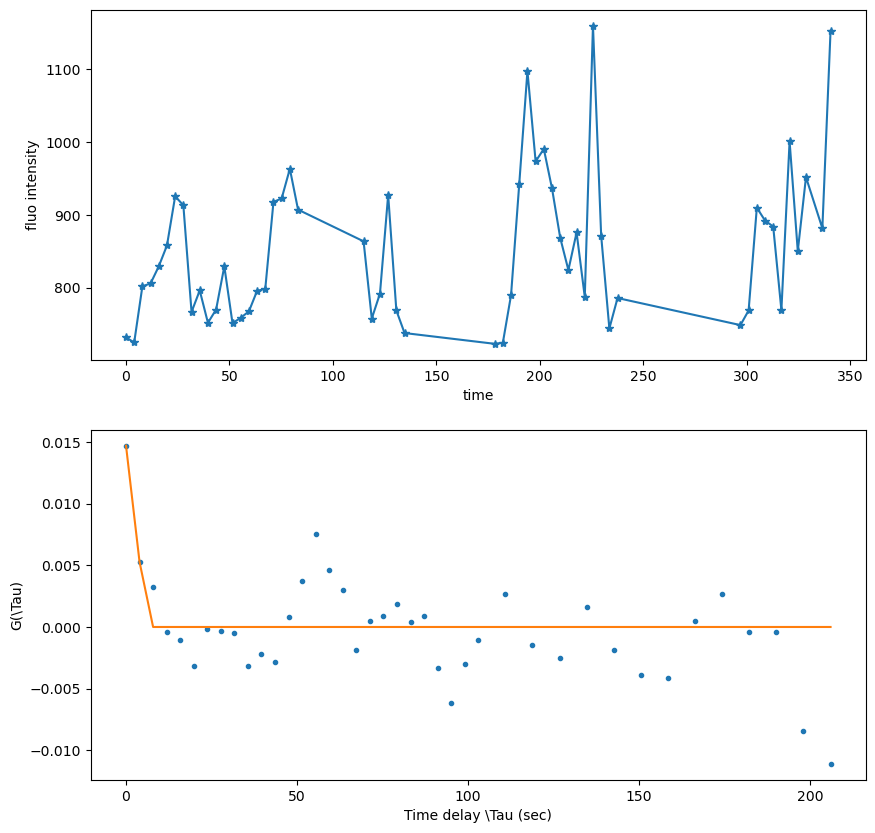

In [28]:
fig, ax = plt.subplots(2,1)

ax[0].plot(x,y, "*-")
# ax[0].plot(x,y_cutoff)
ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")


ax[1].plot(x_auto, y_auto, '.')
ax[1].plot(x_auto, fit_function(x_auto, PROTEIN_SIZE/elongation_r, translation_init_r) )
ax[1].set_xlabel("Time delay \Tau (sec)")
ax[1].set_ylabel("G(\Tau)")
fig.set_size_inches((10,10))

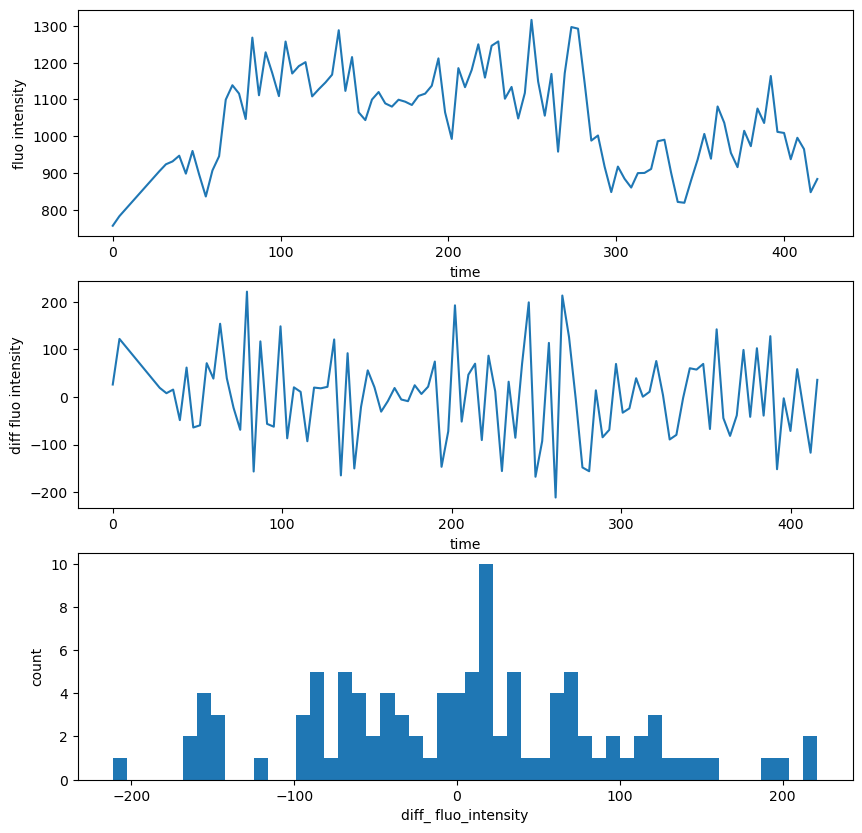

In [14]:
## difference between 2 time points
fig, ax = plt.subplots(3,1)
ax[0].plot(x,y)
ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")

ax[1].plot(x[:-1], np.diff(y))
ax[1].set_xlabel("time")
ax[1].set_ylabel("diff fluo intensity")
_=ax[2].hist(np.diff(y), bins=50)
ax[2].set_ylabel("count")
ax[2].set_xlabel("diff_ fluo_intensity")
fig.set_size_inches((10,10))

In [ ]:
delta_t = DELTA_T
rtol=1e-3
for id_track in np.unique(datas.TRACK_ID):
    (x, 
     y, 
     x_auto, 
     y_auto, 
     elongation_r, 
     translation_init_r) = single_track_analysis(datas, 
                                                 id_track, 
                                                 delta_t = DELTA_T,
                                                 protein_size=PROTEIN_SIZE,
                                                 normalise_intensity=1,
                                                 normalize_auto=True,
                                                 mm=None,
                                                 lowpass_=False,
                                                 cutoff=100,
                                                 rtol=1e-3,
                                                 method="original")
    
    normalise_intensity=1
    x = (datas[datas.TRACK_ID == id_track].sort_values('FRAME')['POSITION_T'].values -
         min(datas[datas.TRACK_ID == id_track].sort_values('FRAME')['POSITION_T'].values))
    y = (datas[datas.TRACK_ID == id_track].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values / normalise_intensity)

    if not check_continuous_time(x, delta_t, rtol=rtol):
        times_diff = np.diff(x)[np.where(np.isclose(np.diff(x), delta_t, rtol=rtol) == False)]
        if (times_diff < 3 * delta_t).all():
            print("to fix")
            i=0
            while i < (len(x)-1):
                if np.round(x[i]-x[i+1], decimals=2)>delta_t:
                    x = x[:i+1] + [(x[i]+x[i+1])/2] + x[i+1:]
                i+=1
        else:
            print("not fix")
            
        
    if x is not np.nan:
        fig, ax = plt.subplots(2,1)
        ax[0].plot(x,y, "*-")
        ax[0].set_xlabel("time")
        ax[0].set_ylabel("fluo intensity")

        ax[1].plot(x_auto, y_auto, '.')
        ax[1].plot(x_auto, fit_function(x_auto, PROTEIN_SIZE/elongation_r, translation_init_r) )
        ax[1].set_xlabel("Time delay \Tau (sec)")
        ax[1].set_ylabel("G(\Tau)")
        fig.set_size_inches((10,10))
        fig.savefig(str(id_track)+".png")

In [10]:
# # bleaching correction
# # open image
# from tifffile import tifffile
# from scipy.optimize import curve_fit

# img = tifffile.imread(path+"DUP_Sun_100x1400_30-488_20msec_AFAP_190_t3.tif")
# mean_intensity = img.mean(axis=1).mean(axis=1)



In [11]:
# fig, ax = plt.subplots()

# x = np.arange(0, len(mean_intensity)*DELTA_T, DELTA_T)
# _ = ax.plot(x, mean_intensity, label="Data")
# fig.set_size_inches((10,5))

In [18]:
from scipy import optimize
popt, pcov = optimize.curve_fit(fit_function,
                  x_auto,
                  y_auto,
                  method='lm')
PROTEIN_SIZE/popt[0], popt[1]

(25.512641585215174, 1.3957503107594884)

In [32]:
import numpy as np
import scipy.signal
import scipy.io.wavfile
import matplotlib.pyplot as plt

def lowpass(data: np.ndarray, cutoff: float, sample_rate: float, poles: int = 5):
    sos = scipy.signal.butter(poles, cutoff, 'lowpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

# Load sample data from a WAV file
data = y
sample_rate = 1/3.96
times = np.arange(len(data))/sample_rate

# Apply a 50 Hz low-pass filter to the original data
filtered = lowpass(data, 0.1, sample_rate)

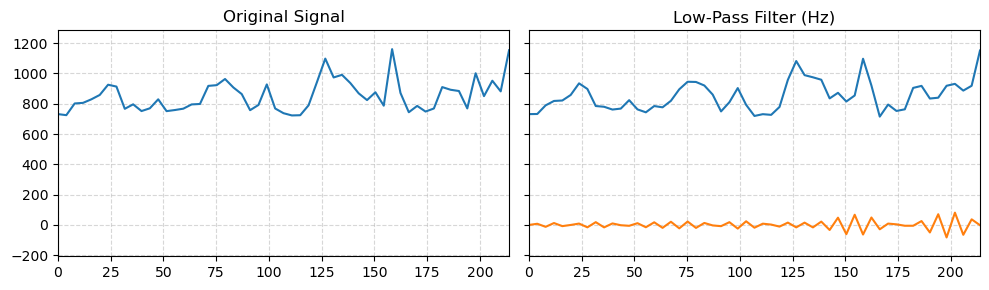

In [33]:
# Code used to display the result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=True)
ax1.plot(times, data)
ax1.set_title("Original Signal")
ax1.margins(0, .1)
ax1.grid(alpha=.5, ls='--')
ax2.plot(times, filtered)
ax2.plot(times, filtered-data)
ax2.set_title("Low-Pass Filter (Hz)")
ax2.grid(alpha=.5, ls='--')
plt.tight_layout()
plt.show()

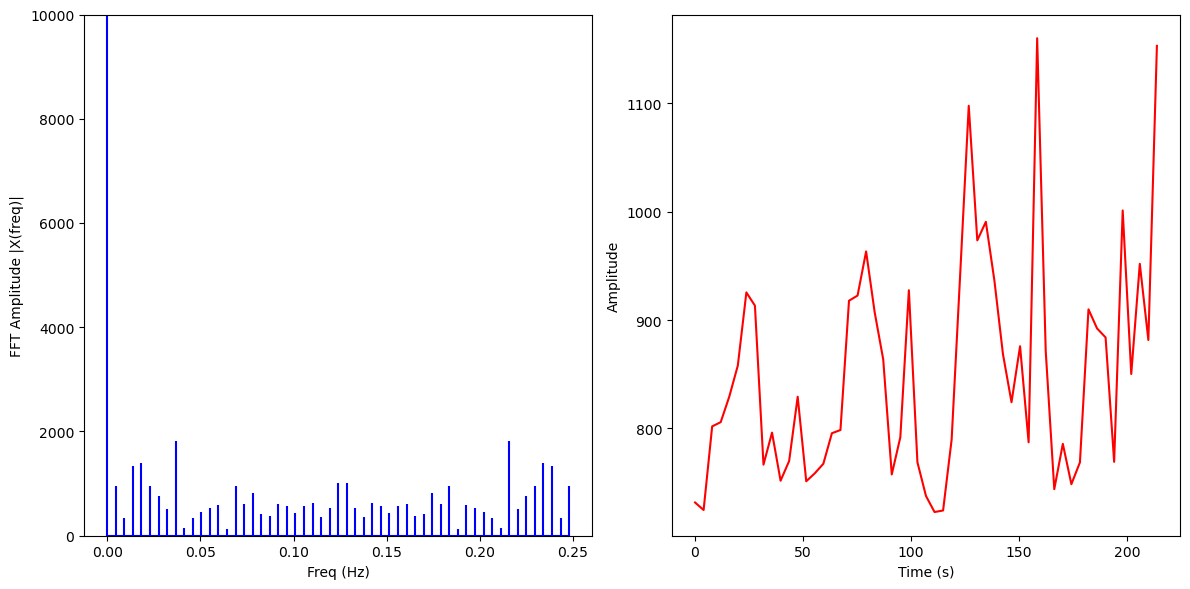

In [34]:
from numpy.fft import fft, ifft

X = fft(y)
N = len(X)
n = np.arange(N)
sr = 1/3.96
ts = 1.0/sr
T = N/sr
freq = n/T 
t = np.arange(0,N*ts,ts)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
# plt.xlim(0, 10)
plt.ylim(0, 10000)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

/tmp/ipykernel_46003/1180526895.py:2: RuntimeWarning: divide by zero encountered in divide
  ax.plot(1/freq, np.abs(X), 'b')


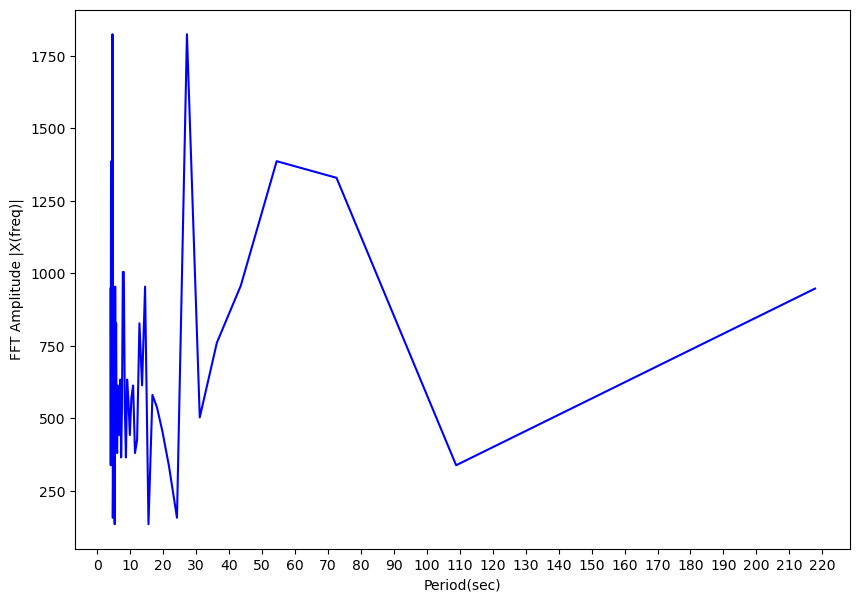

In [41]:
fig, ax = plt.subplots()
ax.plot(1/freq, np.abs(X), 'b')
# ax.hlines(1500, 0,t[-1], 'black', linestyles='dashed')
plt.xlabel('Period(sec)')
plt.ylabel('FFT Amplitude |X(freq)|')
# plt.xlim(0, 50)
# plt.ylim(0, 2000)
plt.locator_params(axis='x', nbins=30) 
fig.set_size_inches(10,7)

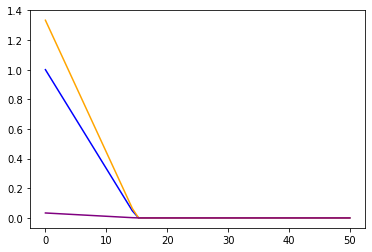

In [38]:
fig, ax = plt.subplots()
t=15
c=1/t
x = np.linspace(0,50)
ax.plot(x,
       ((t - x) / (c * t ** 2)) * np.heaviside((t - x), 0),
       color='blue')

c=0.05
ax.plot(x,
       ((t - x) / (c * t ** 2)) * np.heaviside((t - x), 0),
       color="orange")

c=2
ax.plot(x,
       ((t - x) / (c * t ** 2)) * np.heaviside((t - x), 0),
       color="purple")

# plot all track that was keep in result table

In [45]:
# DELTA_T = 0.02174573
DELTA_T = 3.96
PROTEIN_SIZE = 1200

In [46]:
columns = ['file_name', 'track_id','len_track', 'elongation_time', 'init_translation_rate']
result = pd.DataFrame(columns=columns, dtype=float)
elongation_time=[]
translation_rate=[]

f=path+files[0]
datas = read_csv_file(f)



for id_track in np.unique(datas['TRACK_ID']):
    
    (x, 
     y, 
     x_auto, 
     y_auto, 
     elongation_r, 
     translation_init_r) = single_track_analysis(datas, 
                                                 id_track, 
                                                 delta_t = DELTA_T,
                                                 protein_size=PROTEIN_SIZE,
                                                 normalise_intensity=1,
                                                 normalize_auto=True,
                                                 mm=None,
                                                 lowpass_=False,
                                                 cutoff=100,
                                                 rtol=1e-3,
                                                 method="linear"
                                                )
    if elongation_r>5:
        d = pd.DataFrame.from_dict({'file_name':f.split('/')[-2],
                                    'track_id':id_track,
                                    'len_track': len(x),
                                    'elongation_time':elongation_r,
                                    'init_translation_rate':translation_init_r},
                                   orient='index').T
        result = pd.concat([result, d], ignore_index=True)


result['tmp'] = 1
result[["track_id","len_track","elongation_time","init_translation_rate"]].mean()

not fix
not fix
linear method
[-0.00020322  0.0129935 ]
to fix
linear method
[-0.00056583  0.08516182]
not fix
not fix
not fix
not fix
not fix
linear method
[-0.00045406  0.00941048]
not fix
linear method
[-4.06636334e-05  5.41219955e-03]
not fix
not fix
not fix
linear method
[-0.00024544  0.01026873]
not fix
not fix
not fix
not fix
not fix
to fix
linear method
[-0.00017624  0.00543311]
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
to fix
linear method
[-0.00067865  0.01550851]
not fix
to fix
linear method
[-0.00016054  0.01086729]
not fix
not fix
linear method
[-0.0001688   0.02106156]
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
to fix
linear method
[-0.00023495  0.02372476]
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
not fix
linear method
[-0.00021488  0.0184094 ]
to fix
linear method


track_id                 125.393939
len_track                 66.545455
elongation_time           34.747573
init_translation_rate      2.309329
dtype: object

In [34]:
result.sort_values("track_id")

,file_name,track_id,len_track,elongation_time,init_translation_rate,tmp
0,03-Dropbox,3,97,15.151515,0.971737,1
1,03-Dropbox,4,145,8.190008,0.080142,1
2,03-Dropbox,12,47,43.290043,3.833497,1
3,03-Dropbox,16,152,9.182736,1.413895,1
4,03-Dropbox,22,35,27.548209,2.235606,1
5,03-Dropbox,32,36,37.878788,5.809871,1
6,03-Dropbox,66,59,50.505051,2.713835,1
7,03-Dropbox,68,103,15.151515,1.161859,1
8,03-Dropbox,76,105,8.912656,0.352643,1
9,03-Dropbox,92,98,10.449321,0.367033,1


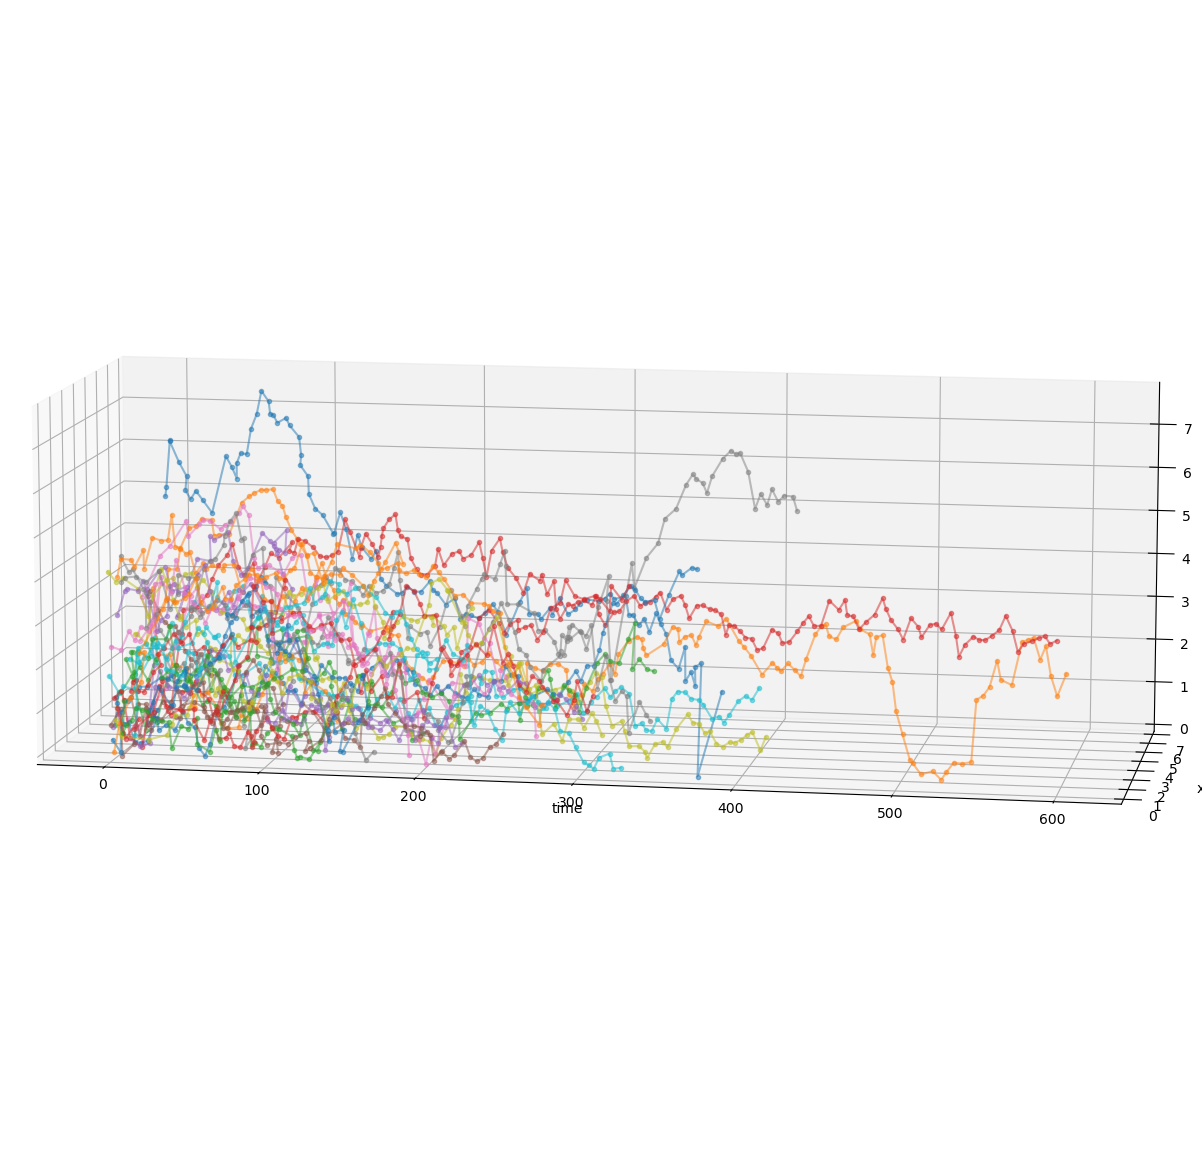

In [11]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')

# ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 0.5, 0.5, 1]))
ax.set_box_aspect(aspect = (3,1,1))


for id_ in np.unique(result['track_id'].to_numpy()):
# for id_ in [10,710,3021,7,16,8010,5471]:
# for id_ in [9353,19,5756,2881,11,6592,2092,1512,1754,6495,3108,1129,6350]:
    x = (datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].to_numpy()
         - np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].to_numpy()))
    y = (datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_X'].to_numpy()
         - np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_X'].to_numpy()))
    z = (datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_Y'].to_numpy()
         - np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_Y'].to_numpy()))
    
    ax.plot(x, 
            y, 
            z, 
            '.-',
            alpha = 0.5
            )

ax.set_xlabel('time')
ax.set_ylabel('x')
ax.set_zlabel('y')
fig.set_size_inches((15, 15))

ax.view_init(elev=10., azim=-80)

original method
to fix
original method
original method
to fix
original method
to fix
original method
original method
to fix
original method
original method
to fix
original method
original method
original method
original method
original method
original method
original method
original method
original method
original method
to fix
original method


/home/u2175049/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


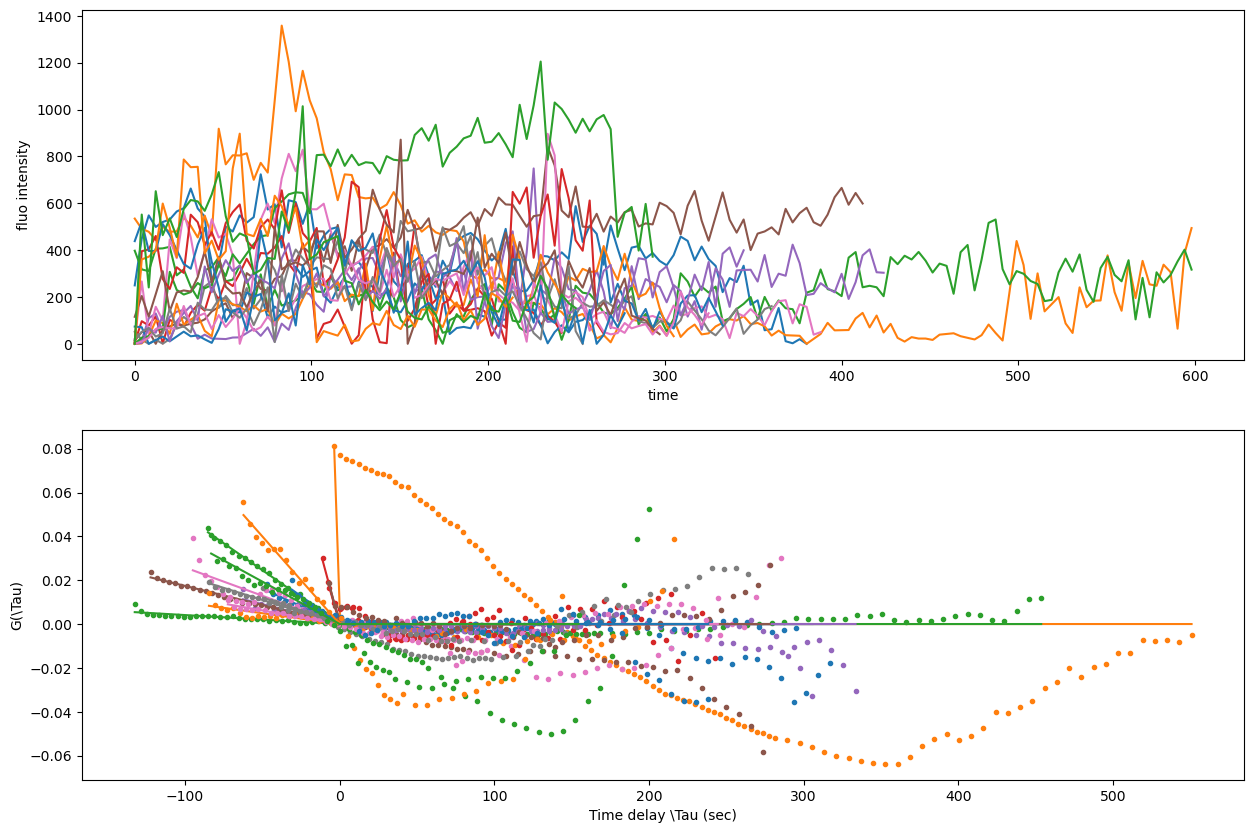

In [12]:
import matplotlib.colors as mcolors
fig, ax = plt.subplots(2,1)

colors = list(mcolors.TABLEAU_COLORS.keys())

i=0
for id_track in np.unique(result['track_id']):#[:5]:
# for id_track in [10,710,3021,7,16,8010,5471]:
# for id_track in [9353,19,5756,2881,11,6592,2092,1512,1754,6495,3108,1129,6350]:

    x = datas[datas.TRACK_ID==id_track].sort_values('FRAME')['POSITION_T'].values-min(datas[datas.TRACK_ID==id_track].sort_values('FRAME')['POSITION_T'].values)
    y = datas[datas.TRACK_ID==id_track].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values-np.min(datas[datas.TRACK_ID==id_track].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values)
    
    if len(x)>50:
        ax[0].plot(x, y, color=colors[i])


        (x, 
         y, 
         x_auto, 
         y_auto, 
         elongation_r, 
         translation_init_r) = single_track_analysis(datas, 
                                                     id_track, 
                                                     delta_t = DELTA_T,
                                                     protein_size=PROTEIN_SIZE,
                                                     normalise_intensity=1,
                                                     normalize_auto=True,
                                                     mm=None,
                                                     lowpass_=False,
                                                     cutoff=100,
                                                     rtol=1e-3,
                                                     method="original"
                                                    )


        ax[1].plot(x_auto-PROTEIN_SIZE/elongation_r, 
                   y_auto, 
                   '.', 
                   color=colors[i])
        ax[1].plot(x_auto-PROTEIN_SIZE/elongation_r, 
                   fit_function(x_auto, PROTEIN_SIZE/elongation_r, translation_init_r ), 
                   color=colors[i] )



        if i == 7:
            i=0
        else:
            i+=1

ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")
ax[1].set_xlabel("Time delay \Tau (sec)")
ax[1].set_ylabel("G(\Tau)")
# ax[1].set_ylim(-0.002, 0.002)


fig.set_size_inches((15,10))
# print(len(np.unique(result['track_id'])))

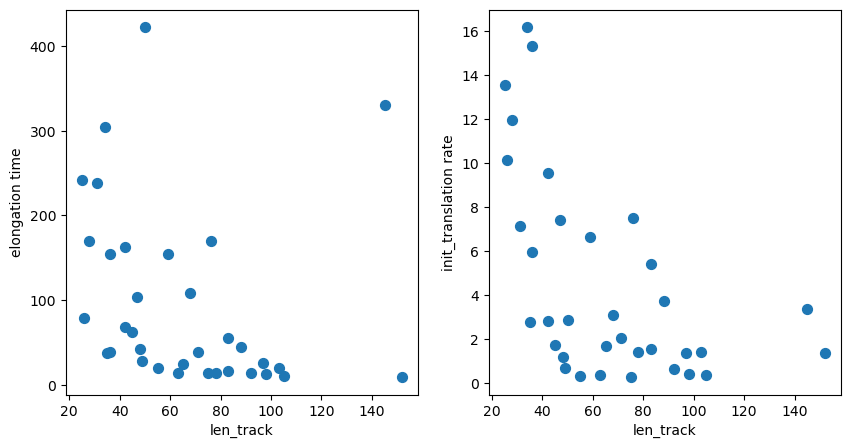

In [13]:
fig, ax = plt.subplots(1, 2)
ax[0].scatter(result['len_track'], result['elongation_time'], s=50)
ax[1].scatter(result['len_track'], result['init_translation_rate'], s=50)
ax[0].set_xlabel('len_track')
ax[0].set_ylabel('elongation time')

ax[1].set_xlabel('len_track')
ax[1].set_ylabel('init_translation rate')
fig.set_size_inches((10,5))

# Multiple file analysis

In [30]:
DELTA_T = 0.02174573
PROTEIN_SIZE = 1200

In [31]:
columns = ['file_name', 'track_id','len_track', 'elongation_time', 'init_translation_rate']
result = pd.DataFrame(columns=columns, dtype=float)
elongation_time=[]
translation_rate=[]
for f in files:
    f = path+f
    datas = read_csv_file(f)


    for id_track in np.unique(datas['TRACK_ID']): 
        (x, 
         y, 
         x_auto, 
         y_auto, 
         elongation_r, 
         translation_init_r) = single_track_analysis(datas, 
                                                     id_track, 
                                                     delta_t = DELTA_T,
                                                     protein_size=PROTEIN_SIZE,
                                                     normalise_intensity=1,
                                                     normalize=True,
                                                     lowpass_=False,
                                                     cutoff=100,
                                                     rtol=1e-5)

        
        if elongation_r>5:
            d = pd.DataFrame.from_dict({'file_name':f.split('/')[-1],
                                        'track_id':id_track,
                                        'len_track': len(x),
                                        'elongation_time':elongation_r,
                                        'init_translation_rate':translation_init_r},
                                       orient='index').T
            result = pd.concat([result, d], ignore_index=True)



result['tmp'] = 1
# result.drop(result[result["len_track"]<100].index, inplace=True)

to fix
[-0.0007425   0.00069405]
[-0.0020445   0.00387391]
[-0.00144715  0.00092915]
to fix
[-0.00141625  0.00104435]
to fix
[-0.00072696  0.00036677]
to fix
[-0.00148758  0.00205108]
to fix
[-0.00058811  0.00021901]
to fix
[-0.001509    0.00154289]
to fix
[-0.00115759  0.00092129]
to fix
[-0.00091516  0.00032588]
to fix
[-0.00254898  0.00027349]
[-0.00050273  0.00047365]
to fix
[-0.00034881  0.00043379]
to fix
[-0.00114481  0.00052287]
[-0.00049144  0.00037666]
to fix
[-0.00100915  0.00017856]
to fix
[-0.00086698  0.00044044]
to fix
[-0.00667548  0.00148766]
to fix
[-0.00072542  0.00040078]
[-0.00085945  0.00013252]
to fix
[-0.01099911  0.00341873]
to fix
[-0.00711054  0.00591367]
to fix
[-0.01225758  0.00165725]
to fix
[-0.01319132  0.00505874]
to fix
[-0.00678084  0.00838367]
to fix
[-0.01039928  0.00875264]
to fix
[-0.01080305  0.00567747]
to fix
[-0.02223419  0.00411616]
to fix
[-0.00233041  0.00116768]
to fix
[-0.03785396  0.00867315]
to fix
[-0.0055956   0.00180228]
to fix
[-0.0

In [32]:
# result.sort_values('len_track')
result

,file_name,track_id,len_track,elongation_time,init_translation_rate,tmp
0,DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv,7,205,1379.581187,1656.441608,1
1,DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv,10,267,627.082358,134.894429,1
2,DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv,11,118,1532.867985,1374.796757,1
3,DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv,16,192,1672.21962,1334.339408,1
4,DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv,19,149,2043.82398,4643.775115,1
...,...,...,...,...,...,...
145,DUP_Sun_100x1400_30-488_20msec_AFAP_190_t9_tra...,8351,117,2122.432595,1537.215601,1
146,DUP_Sun_100x1400_30-488_20msec_AFAP_190_t9_tra...,8388,113,4244.86519,3267.643292,1
147,DUP_Sun_100x1400_30-488_20msec_AFAP_190_t9_tra...,9193,116,6897.905934,2487.970326,1
148,DUP_Sun_100x1400_30-488_20msec_AFAP_190_t9_tra...,9746,112,5016.658861,6964.982522,1


track_id                  4032.125000
len_track                  150.625000
elongation_time          19482.804586
init_translation_rate    58660.438013
tmp                          1.000000
dtype: float64


/tmp/ipykernel_366698/2862878632.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(result.mean())


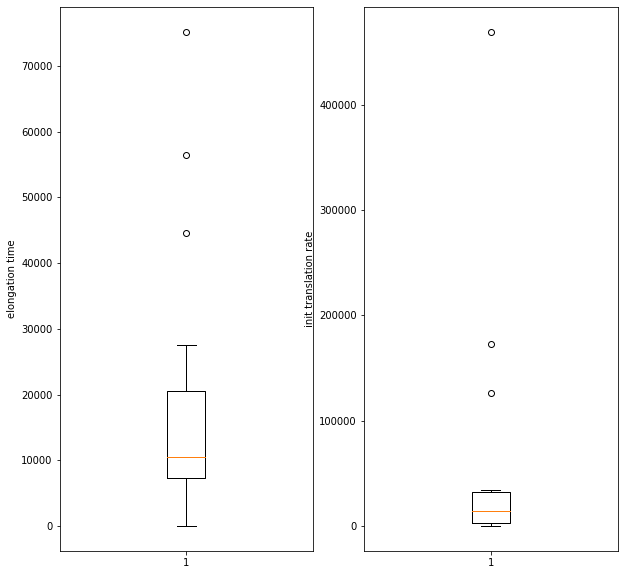

In [195]:
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(result['elongation_time'])
ax[1].boxplot(result['init_translation_rate'])
ax[0].set_ylabel('elongation time')
ax[1].set_ylabel('init translation rate')
fig.set_size_inches((10,10))
print(result.mean())

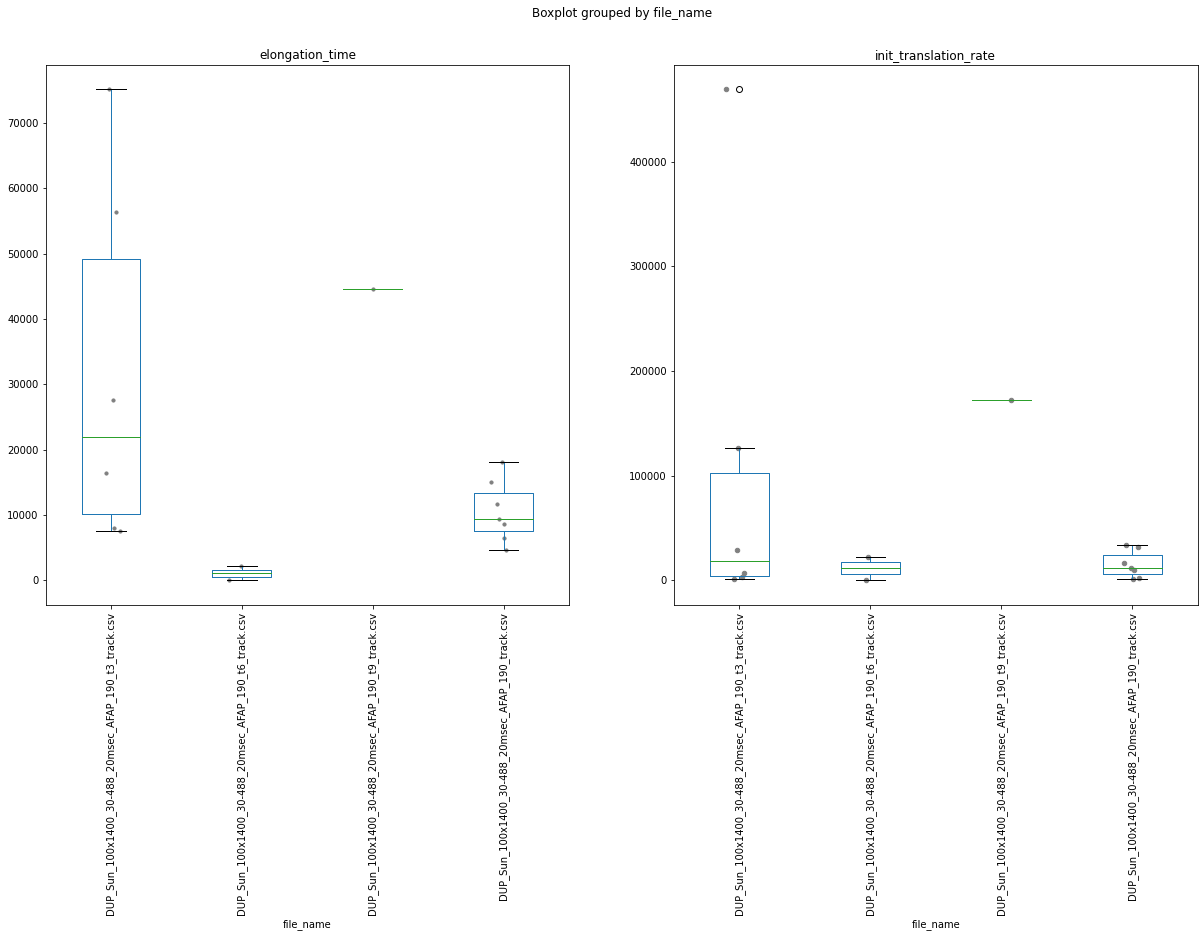

In [196]:
# result['elongation_time'] = pd.to_numeric(result['elongation_time'])
fig, ax = plt.subplots(1,2)
result.boxplot(['elongation_time'] , 
               by='file_name', 
               grid=False, 
               ax = ax[0],
               rot=90, 
              )

result.boxplot([ 'init_translation_rate'] , 
               by='file_name', 
               grid=False, 
               ax = ax[1],
               rot=90
               )

group = 'file_name'
column = 'elongation_time'
grouped = result.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[0].scatter(x, val, c='grey', alpha=1, s=10)
    
    
group = 'file_name'
column = 'init_translation_rate'
grouped = result.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[1].scatter(x, val, c='grey', alpha=1, s=20)
    
# ax[1].set_ylim(0,250)
fig.set_size_inches((20,10))

In [197]:
result.groupby(by='file_name')[['len_track','elongation_time', 'init_translation_rate']].mean()

,len_track,elongation_time,init_translation_rate
file_name,,,
DUP_Sun_100x1400_30-488_20msec_AFAP_190_t3_track.csv,122.666667,31851.439123,105996.340208
DUP_Sun_100x1400_30-488_20msec_AFAP_190_t6_track.csv,114.500000,1067.004762,11317.624959
DUP_Sun_100x1400_30-488_20msec_AFAP_190_t9_track.csv,109.000000,44568.529603,172373.790806
DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv,190.857143,10559.099929,15368.560890


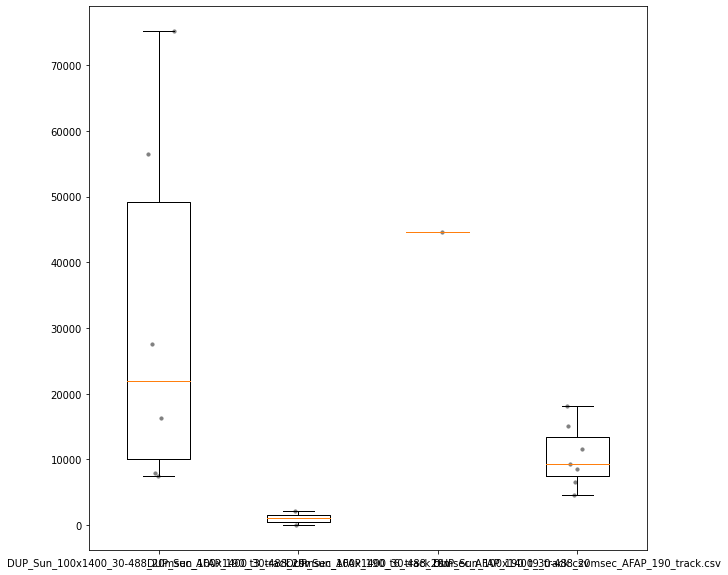

In [198]:
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# initialize dataframe
# n = 200
# ngroup = 3
# df = pd.DataFrame({'data': np.random.rand(n), 'group': map(np.floor, np.random.rand(n) * ngroup)})
fig, ax = plt.subplots()

group = 'file_name'
column = 'elongation_time'
grouped = result.groupby(group)

names, vals, xs = [], [] ,[]

for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

ax.boxplot(vals, labels=names, )
ngroup = len(vals)



for x, val, clevel in zip(xs, vals, clevels):
    ax.scatter(x, val, c='grey', alpha=1, s=10)
    
ax.grid(False)
fig.set_size_inches((10,10))

In [199]:
result[["file_name", 'len_track','elongation_time', 'init_translation_rate']]

,file_name,len_track,elongation_time,init_translation_rate
0,DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv,205,9318.07351,11914.330514
1,DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv,267,4580.418322,989.748806
2,DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv,192,11648.633438,9614.170446
3,DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv,201,6529.842023,2621.069846
4,DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv,150,8592.012892,16662.326354
5,DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv,161,18147.536132,31855.077786
6,DUP_Sun_100x1400_30-488_20msec_AFAP_190_track.csv,160,15097.183184,33923.202475
7,DUP_Sun_100x1400_30-488_20msec_AFAP_190_t3_tra...,122,27602.012523,7137.752191
8,DUP_Sun_100x1400_30-488_20msec_AFAP_190_t3_tra...,164,7521.844156,726.496959
9,DUP_Sun_100x1400_30-488_20msec_AFAP_190_t3_tra...,159,8002.205743,3564.989263


In [200]:
result[["file_name", 'len_track','elongation_time', 'init_translation_rate']].mean()

/tmp/ipykernel_366698/1952775797.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  result[["file_name", 'len_track','elongation_time', 'init_translation_rate']].mean()


len_track                  150.625000
elongation_time          19482.804586
init_translation_rate    58660.438013
dtype: float64

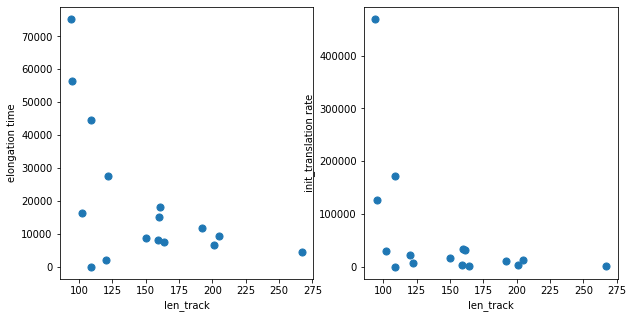

In [201]:
fig, ax = plt.subplots(1, 2)
ax[0].scatter(result['len_track'], result['elongation_time'], s=50)
ax[1].scatter(result['len_track'], result['init_translation_rate'], s=50)
ax[0].set_xlabel('len_track')
ax[0].set_ylabel('elongation time')

ax[1].set_xlabel('len_track')
ax[1].set_ylabel('init_translation rate')
fig.set_size_inches((10,5))

In [202]:
result["len_track"]*DELTA_T

0     0.615
1     0.801
2     0.576
3     0.603
4      0.45
5     0.483
6      0.48
7     0.366
8     0.492
9     0.477
10    0.285
11    0.282
12    0.306
13    0.327
14     0.36
15    0.327
Name: len_track, dtype: object